In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

def plot_episode_scores(file_paths,column_name, window=50):
    """
    Plots the rolling average of 'episode_score' from multiple CSV files.
    
    Args:
        file_paths (list of str): List of paths to CSV files.
        window (int): Rolling window size for smoothing the plot.
    """
    plt.figure(figsize=(15, 10))

    for file_path in file_paths:
        try:
            df = pd.read_csv(file_path)
            if column_name in df.columns:
                label = os.path.split(os.path.dirname(file_path))[1]  # experiment folder name
                plt.plot(df[column_name].rolling(window=window).mean(), label=label)
            else:
                print(f"{column_name} not found in {file_path}")
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

    plt.xlabel('Index')
    plt.ylabel(column_name)
    plt.title(f'{column_name} Comparison Across Experiments')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_episode_score_distribution(file_paths,column_name):
    """
    Plots KDE (density) plots of 'episode_score' from multiple CSV files.
    
    Args:
        file_paths (list of str): List of paths to CSV files.
    """
    plt.figure(figsize=(10, 6))

    for file_path in file_paths:
        try:
            df = pd.read_csv(file_path)
            if column_name in df.columns:
                label = os.path.split(os.path.dirname(file_path))[1]  # experiment folder name
                sns.kdeplot(df[column_name], label=label, fill=True)
            else:
                print(f"{column_name} column not found in {file_path}")
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.title(f'{column_name} Distribution Across Experiments')
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_best_tile_score_distribution(file_paths, column_name='best_tile_score'):
    """
    Plots a grouped bar chart showing the value count distribution of 'best_tile_score'
    across multiple experiments.

    Args:
        file_paths (list of str): List of paths to CSV files.
        column_name (str): The name of the column to analyze. Default is 'best_tile_score'.
    """
    score_counts = {}
    all_scores = set()

    # Read each CSV and compute value counts
    for file_path in file_paths:
        try:
            df = pd.read_csv(file_path)
            if column_name in df.columns:
                label = os.path.split(os.path.dirname(file_path))[1]
                counts = df[column_name].value_counts().sort_index()
                score_counts[label] = counts
                all_scores.update(counts.index)
            else:
                print(f"'{column_name}' column not found in {file_path}")
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

    all_scores = sorted(all_scores)
    
    # Combine into a DataFrame with missing values filled as 0
    combined = pd.DataFrame({
        label: score_counts[label].reindex(all_scores, fill_value=0)
        for label in score_counts
    })

    # Plot
    combined.plot(kind='bar', figsize=(14, 8))
    plt.xlabel('Best Tile Score')
    plt.ylabel('Count')
    plt.title(f'{column_name} Distribution Across Experiments')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


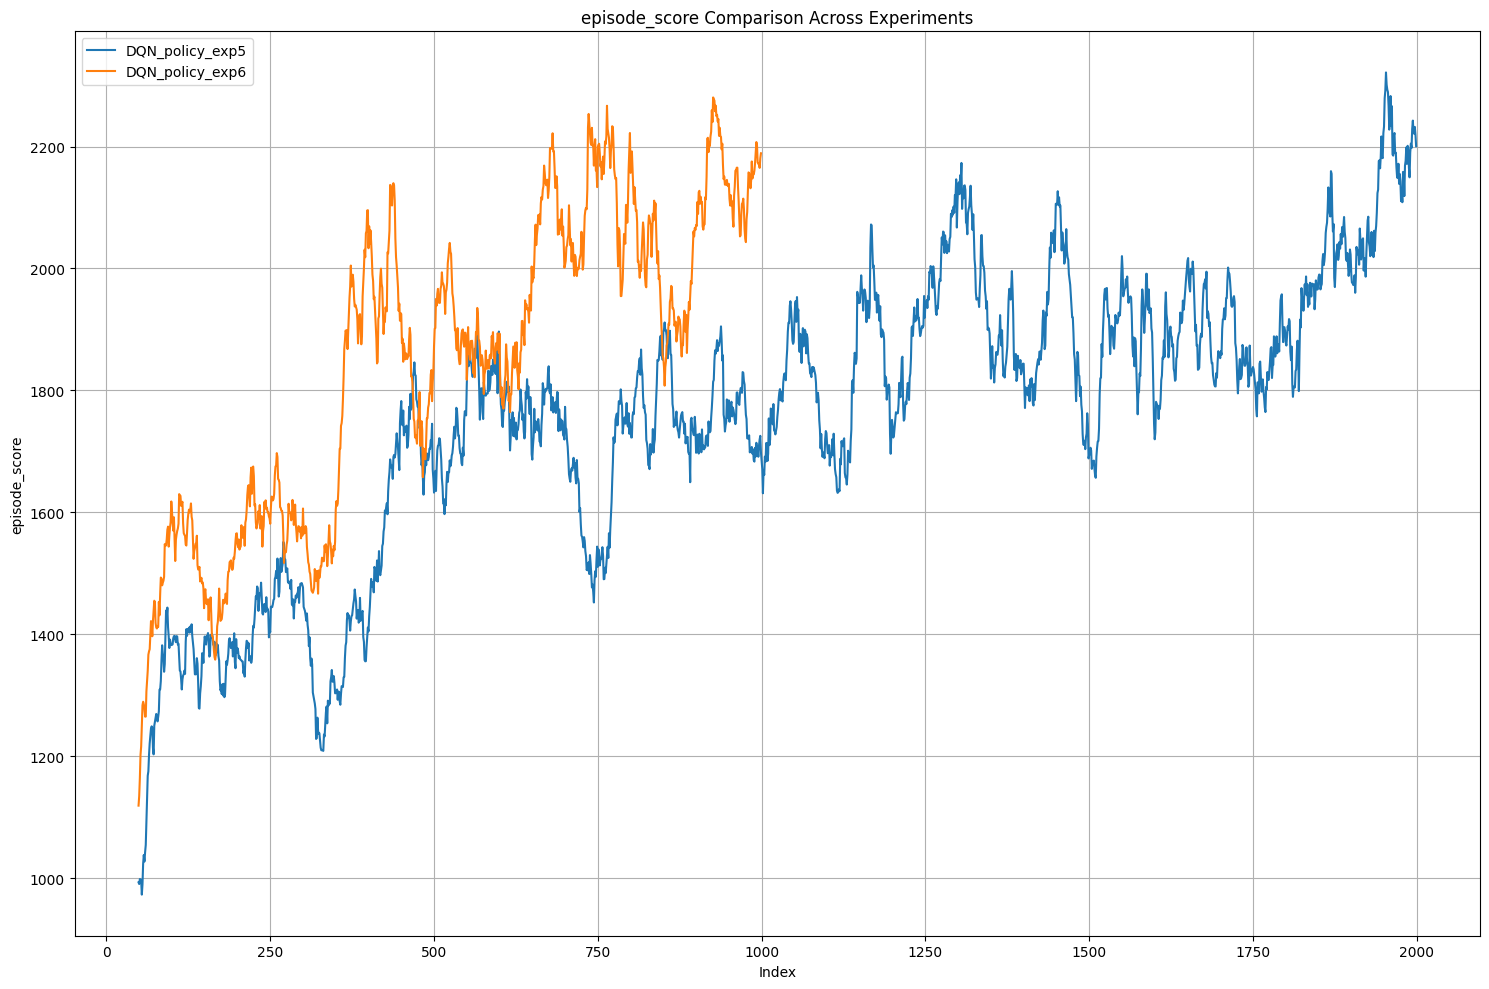

In [13]:
files = [
    r'output\DQN_policy_exp5\train_log.csv',
    r'output\DQN_policy_exp6\train_log.csv',
]

plot_episode_scores(files,'episode_score')

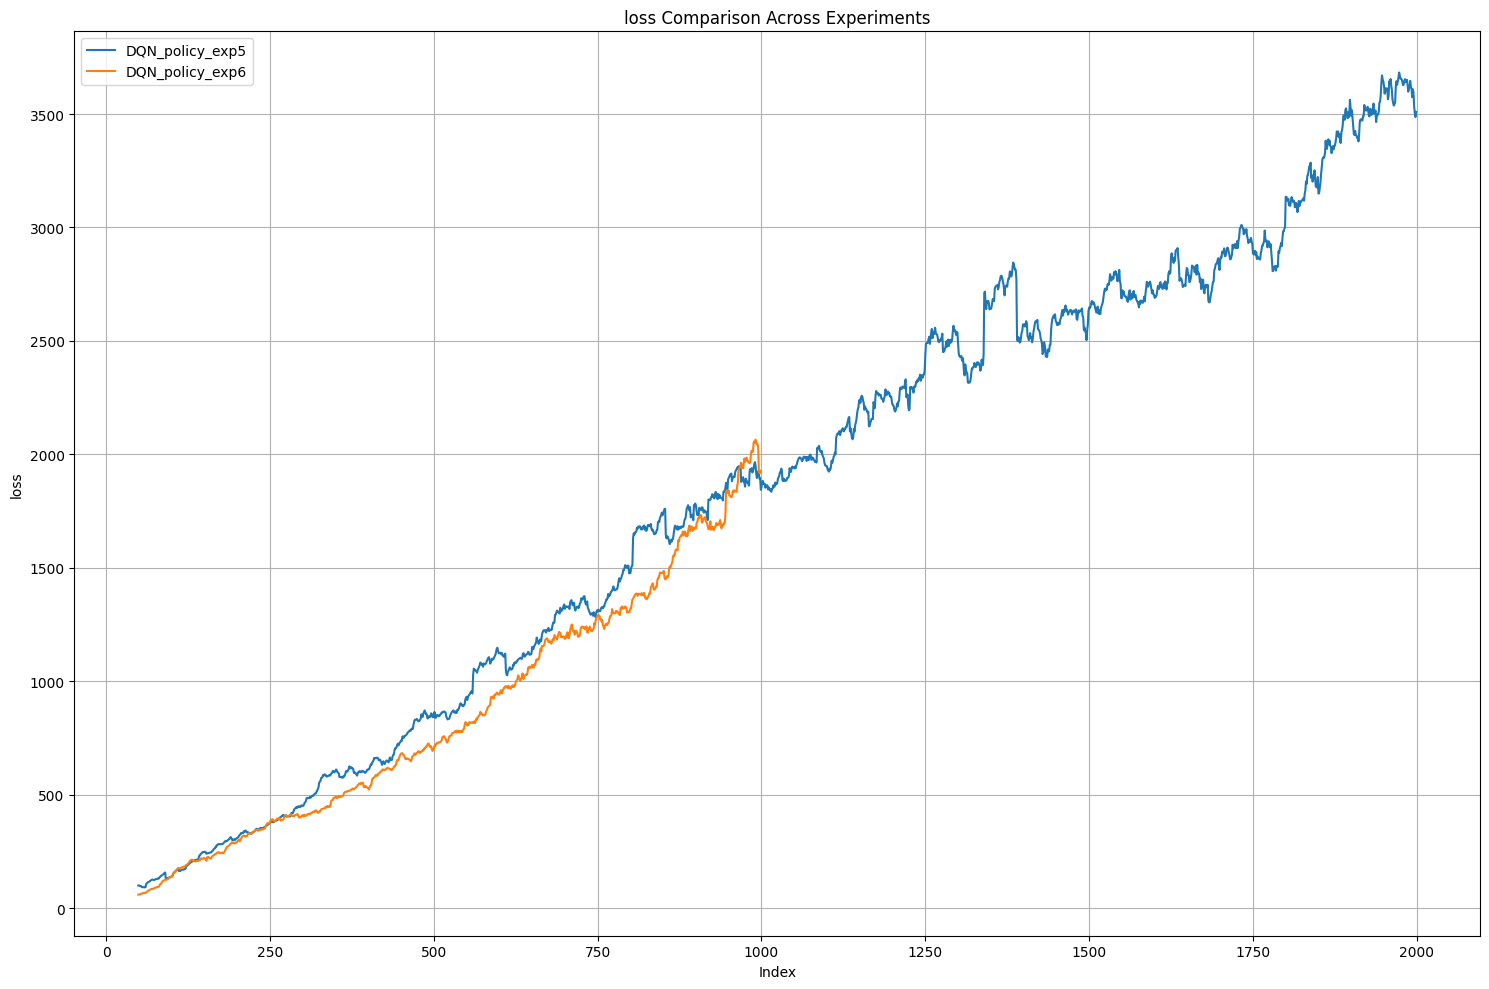

In [14]:
files = [
    r'output\DQN_policy_exp5\train_log.csv',
    r'output\DQN_policy_exp6\train_log.csv',
]

plot_episode_scores(files,'loss')

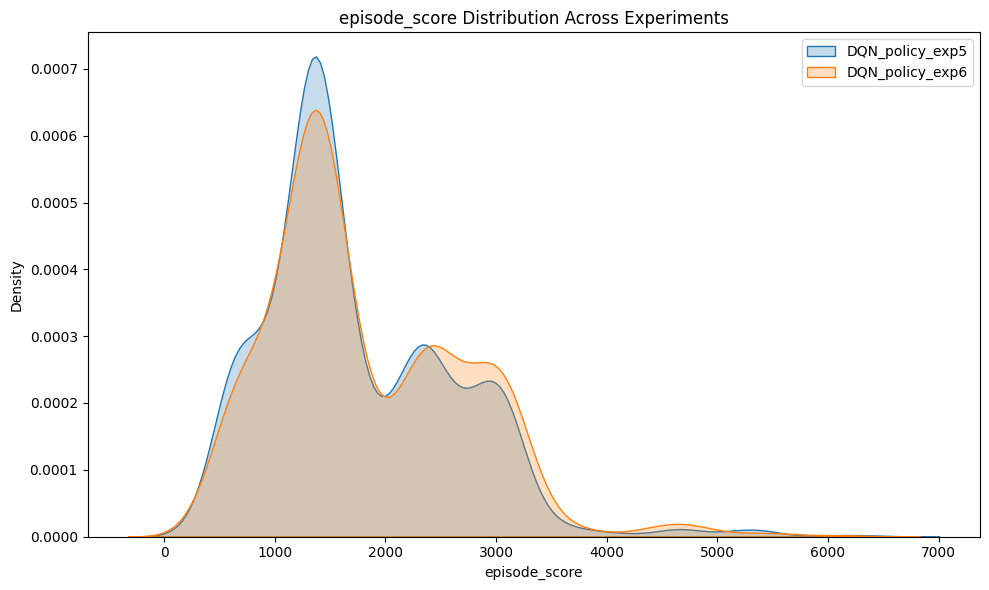

In [15]:
plot_episode_score_distribution(files,'episode_score')

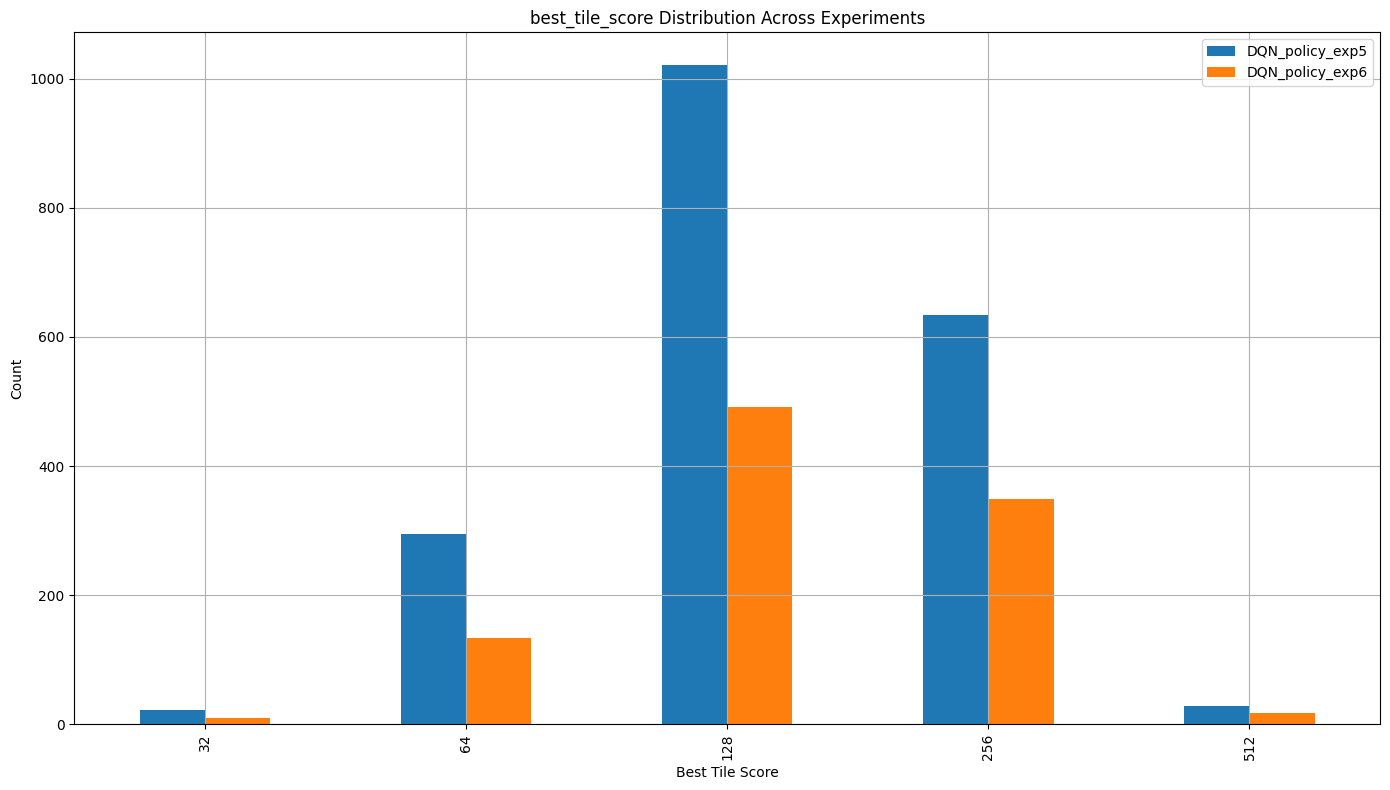

In [17]:
plot_best_tile_score_distribution(files)
